What is a data scientist? Seems like it means different things to different people. Well, what if we let the companies who need a data scientist tell us?

To do this, let's look at jobs on [Stack Overflow](stackoverflow.com). The advantage here is that each posting is along the same html format, as opposed to other sites like Indeed.com or Monster.com, where job descriptions vary by company. To do this, we need a cursory knowledge of html, and a python package that helps us with the heavy lifting.

In [1]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from urllib2 import urlopen
import string
import unicodedata
from IPython.display import Image
from nltk.corpus import stopwords

### Getting started

Here I'm using a job posting that I found by doing a simple seach for "data scientist" and choosing the
first result. This is fed in as `BASE_URL`, but this posting will likely expire and can be switched out easily.

We'll read in the posting using `urlopen` and then parse the page with `BeautifulSoup`.



In [2]:
BASE_URL = "http://careers.stackoverflow.com/jobs/89632/data-scientist-palo-alto-or-seattle-coupang?searchTerm=data+scientist"
html = urlopen(BASE_URL)
soup = BeautifulSoup(html, "lxml")

### A first look

Let's take a look at the website rendered locally on a browser. 

P.S. how was I able to get a picture of the whole webpage? I used the command-line tool [webkit2png](http://www.paulhammond.org/webkit2png/)   :)

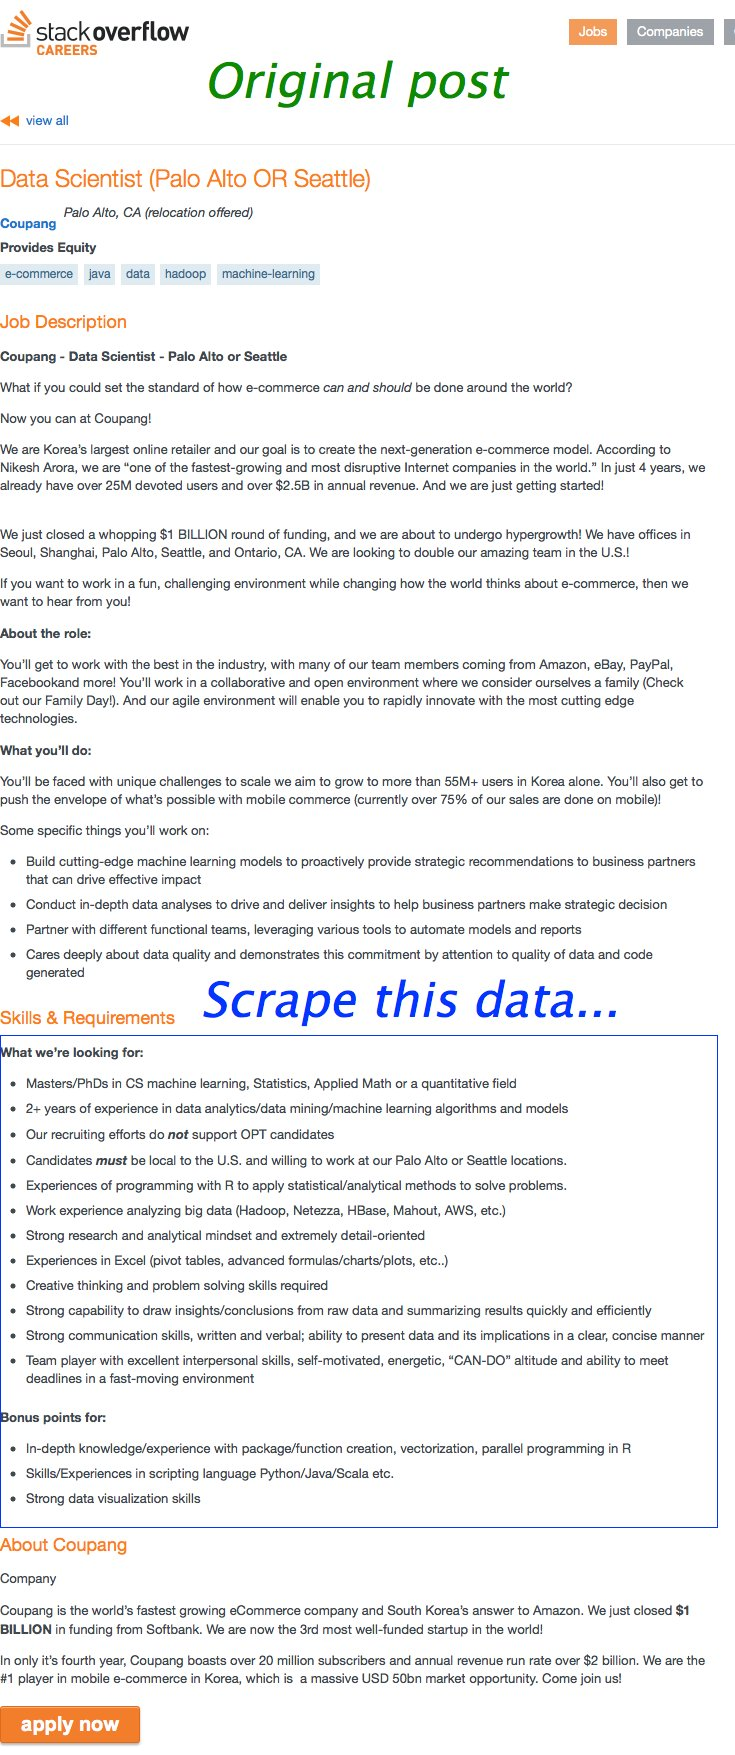

In [4]:
Image(filename='../../dataSandbox/forPelican/dataSciencePost2.jpg') 

### Finding our target

There's our target, the box above, shown in blue. We can figure out how to scrape it by looking directly at the elements in the extracted html. See below.

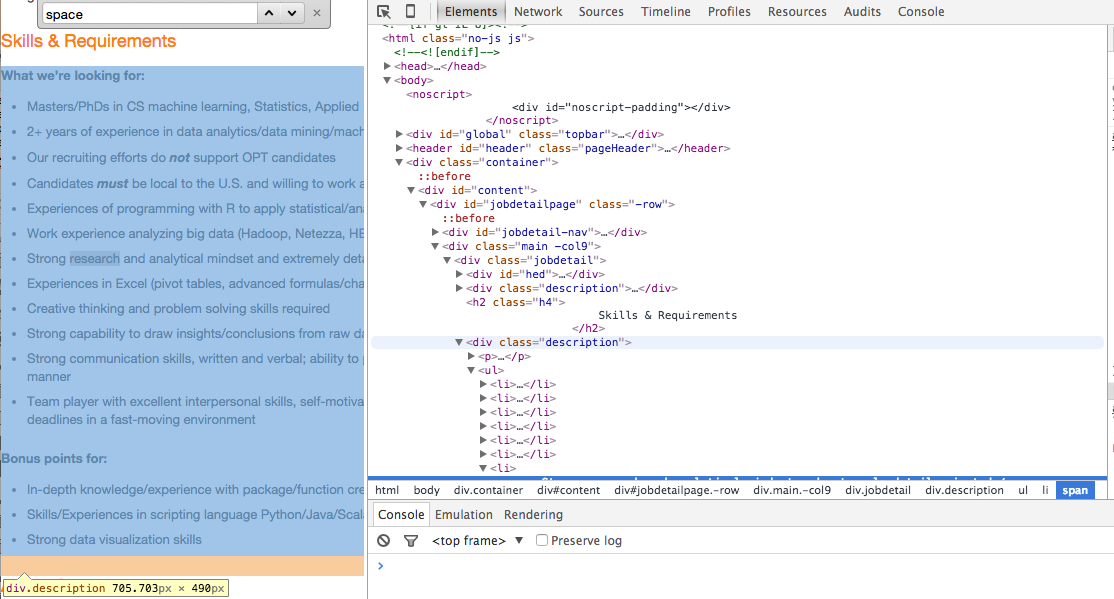

In [5]:
Image(filename = '../../dataSandbox/forPelican/elementsHtml.png')

### Scraping the lists

What you can see is that the elements we want are list `<li>` elements, which are children of `<div class="description">`. So what we will do is

1. Use Beautiful Soup to find `<div class="description">`, and choose the second instance, which contains the Skills and Requirements.
2. Find list `<li>` elements within `<div class="description">`.
3. Clean up the text.

In [6]:
rawSkills = soup.findAll("div", { "class" : "description" })[1].findAll('li')  #Get list elements

skills = unicode.join(u'\n',map(unicode,rawSkills))   #Switch away from ResultSet
skills = re.sub('<[^>]*>', '', skills)             #Remove elements from text
skills = re.sub('[()/!@#$,]', ' ', skills)         #Get rid of spurious characters
print skills

Masters PhDs in CS machine learning  Statistics  Applied Math or a quantitative field
2+ years of experience in data analytics data mining machine learning algorithms and models
Our recruiting efforts do not support OPT candidates
Candidates must be local to the U.S. and willing to work at our Palo Alto or Seattle locations.
Experiences of programming with R to apply statistical analytical methods to solve problems.
Work experience analyzing big data  Hadoop  Netezza  HBase  Mahout  AWS  etc. 
Strong research and analytical mindset and extremely detail-oriented
Experiences in Excel  pivot tables  advanced formulas charts plots  etc.. 
Creative thinking and problem solving skills required
Strong capability to draw insights conclusions from raw data and summarizing results quickly and efficiently
Strong communication skills  written and verbal; ability to present data and its implications in a clear  concise manner
Team player with excellent interpersonal skills  self-motivated  energeti

### Getting a clean output

Looks good, just text, with the punctuation removed. One more thing, let's get rid of stop words, or common words like "the", "in", etc., that are really not interesting

In [7]:
jobName = soup.find("a", {"class" : "title job-link"}).text.split()[0:3]
jobName = re.sub(r'\W+', '',  unicode.join(u'',map(unicode,jobName)))

filtWords = [i for i in skills.split() if i not in stopwords.words('english')]

df = pd.DataFrame({"words": filtWords})
df['title'] = jobName
df['url'] = BASE_URL.rsplit('/',3)[2]
df.head(10)


words              title    url
0       Masters  DataScientistPalo  89632
1          PhDs  DataScientistPalo  89632
2            CS  DataScientistPalo  89632
3       machine  DataScientistPalo  89632
4      learning  DataScientistPalo  89632
5    Statistics  DataScientistPalo  89632
6       Applied  DataScientistPalo  89632
7          Math  DataScientistPalo  89632
8  quantitative  DataScientistPalo  89632
9         field  DataScientistPalo  89632

### Wrapping up and future ideas

There we go, now we have a nice data frame that we can spit out containing the cleaned up required words along with the title (first three words) and URL.

Now, we can make this into a function and iterate across many postings. Stay tuned!